In [70]:
#DOWNLOAD DATA FROM https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/55e8f966-d5c8-438e-85bc-c7a5a26f4863
#Import libraries here
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import datetime
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline


In [71]:
df=pd.read_excel('COVID-19-geographic-disbtribution-worldwide.xlsx')
df.head(5)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp
0,2020-05-11,11,5,2020,369,5,Afghanistan,AF,AFG,37172386.0,Asia
1,2020-05-10,10,5,2020,255,6,Afghanistan,AF,AFG,37172386.0,Asia
2,2020-05-09,9,5,2020,215,3,Afghanistan,AF,AFG,37172386.0,Asia
3,2020-05-08,8,5,2020,171,2,Afghanistan,AF,AFG,37172386.0,Asia
4,2020-05-07,7,5,2020,168,9,Afghanistan,AF,AFG,37172386.0,Asia


In [72]:
#summing daily values of the timeseries for creating aggregate columns
df['Sum of deaths']=df['deaths']
df['Sum of cases']=df['cases']
for i in range(len(df)-2):
    if df['countriesAndTerritories'].values[len(df)-1-i]==df['countriesAndTerritories'].values[len(df)-2-i]:
        df['Sum of deaths'].values[len(df)-2-i]=df['Sum of deaths'].values[len(df)-1-i]+df['deaths'].values[len(df)-2-i]
    else:
        continue

for i in range(len(df)-2):
    if df['countriesAndTerritories'].values[len(df)-1-i]==df['countriesAndTerritories'].values[len(df)-2-i]:
        df['Sum of cases'].values[len(df)-2-i]=df['Sum of cases'].values[len(df)-1-i]+df['cases'].values[len(df)-2-i]
    else:
        continue
    

In [73]:
#test df
df[df['countriesAndTerritories']=='France'].head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018,continentExp,Sum of deaths,Sum of cases
5377,2020-05-11,11,5,2020,209,70,France,FR,FRA,66987244.0,Europe,26380,139063
5378,2020-05-10,10,5,2020,433,80,France,FR,FRA,66987244.0,Europe,26310,138854
5379,2020-05-09,9,5,2020,642,243,France,FR,FRA,66987244.0,Europe,26230,138421
5380,2020-05-08,8,5,2020,629,178,France,FR,FRA,66987244.0,Europe,25987,137779
5381,2020-05-07,7,5,2020,4183,278,France,FR,FRA,66987244.0,Europe,25809,137150


In [78]:
#https://matplotlib.org/3.1.1/gallery/text_labels_and_annotations/date.html
#https://stackoverflow.com/questions/32100912/changing-the-xlim-by-date-in-matplotlib
#Function to plot the data the user wants
import random
def colorgen():
    random_number = random. randint(0,16777215)
    hex_number = str(hex(random_number))
    hex_number ='#'+ hex_number[2:]
    return hex_number
listacores=['green','blue','red','orange','magenta','yellow',colorgen(),colorgen(),colorgen(),colorgen(),colorgen(),colorgen(),colorgen()]

#countries is a list of countries. Please use _ to represent space as for United_States_of_America
#values is one of the following strings for the y axis:  'deaths','Sum of deaths','cases','Sum of cases'
#escala is the scale of the chart as per matplotlib, for this case, choose one of the following: 'linear', 'log'
def plotar(countries,values,escala):
    global df
    #df2=df[(df['countriesAndTerritories']==countries[0])]
    days = mdates.DayLocator()
    months = mdates.MonthLocator()
    months_fmt = mdates.DateFormatter('%d-%m')
    fig=plt.figure(figsize=(15,8))
    axes1=fig.add_axes([0.1,0.1,0.8,0.8])
    axes1.xaxis.set_major_locator(months)
    axes1.xaxis.set_major_formatter(months_fmt)
    axes1.xaxis.set_minor_locator(days)
    plt.xlim(datetime.datetime(2020,3,1),datetime.datetime.now())
    plt.xlabel('Date')
    plt.ylabel('Daily Value')
    plt.yscale(escala)
    contador=0
    for i in countries:
        df2=df[(df['countriesAndTerritories']==i)]
        x1=df2['dateRep'][df['countriesAndTerritories']==i]
        y1=df2[values][df['countriesAndTerritories']==i]
        axes1.plot(x1,y1,color=listacores[contador],marker='o',label=values+' '+i)
        axes1.grid(True)
        #axes1.format_xdata = mdates.DateFormatter('%m-%d')
        fig.autofmt_xdate()
        contador+=1
        axes1.legend(loc='upper left',fontsize='x-large')

In [79]:
#https://plotly.com/python/map-configuration/#map-projections
#For values, choose one of these strings: 'deaths','Sum of deaths','cases','Sum of cases'
'''The available projections (proj argument) are: 'equirectangular', 'mercator', 'orthographic', 'natural earth', 'kavrayskiy7', 'miller', 
'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 
'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 
'albers usa', 'winkel tripel', 'aitoff' and 'sinusoidal'.'''
#For values, choose one of these strings: 'deaths','Sum of deaths','cases','Sum of cases'
def plotmap(values,proj):

    today=datetime.datetime.now()
    df1=df[df['dateRep']==datetime.datetime(today.year,today.month,today.day-2)]

    #df2 = px.data.gapminder().query("year==2007")
    fig = px.choropleth(df1, locations='countryterritoryCode',
                        color=values, # lifeExp is a column of gapminder
                        hover_name="countriesAndTerritories", # column to add to hover information
                        color_continuous_scale=px.colors.sequential.BuGn,
                        projection=proj)
    fig.show()

In [80]:
'''The available projections (proj argument) are: 'equirectangular', 'mercator', 'orthographic', 'natural earth', 'kavrayskiy7', 'miller', 
'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 
'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 
'albers usa', 'winkel tripel', 'aitoff' and 'sinusoidal'.'''
#For values, choose one of these strings: 'deaths','Sum of deaths','cases','Sum of cases'
def plotmap2(values,proj):
    df1=df[df['dateRep']==datetime.datetime(today.year,today.month,today.day-2)]
    fig = go.Figure(data=go.Choropleth(
        locations = df1['countryterritoryCode'],
        z = df1[values],
        text = df1['countriesAndTerritories'],
        colorscale = 'Blues',
        autocolorscale=False,
        reversescale=True,
        marker_line_color='darkgray',
        marker_line_width=0.5,
        colorbar_title = values,
    ))

    fig.update_layout(
        title_text='Covid '+values,
        geo=dict(
            showframe=False,
            showcoastlines=False,
            projection_type=proj
        ),
        annotations = [dict(
            x=0.55,
            y=0.1,
            xref='paper',
            yref='paper',
            text='Source: <a href="https://data.europa.eu/euodp/en/data/dataset/covid-19-coronavirus-data/resource/55e8f966-d5c8-438e-85bc-c7a5a26f4863">\
                EU Data</a>',
            showarrow = False
        )]
    )

    fig.show()

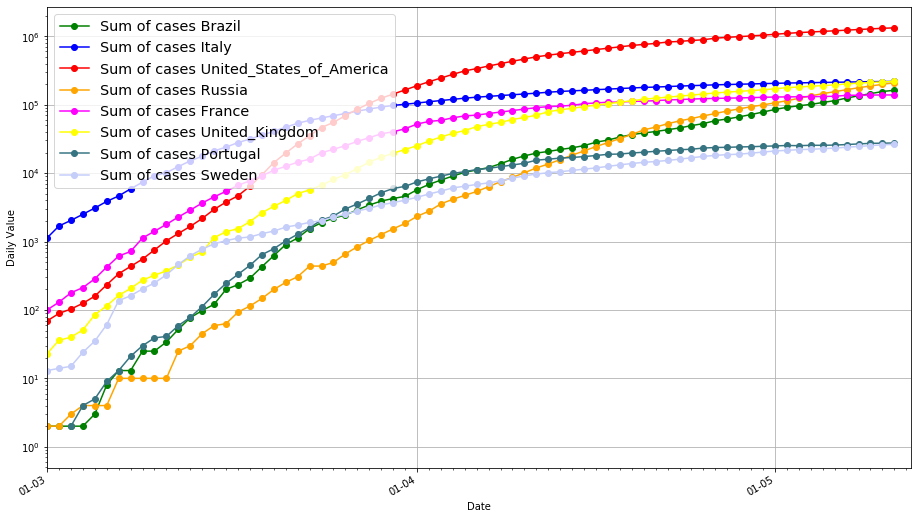

In [81]:
#GRAPH PLOT EXAMPLE
#countries is a list of countries(e.g. ['Brazil','Italy']). Please use _ to represent space as for United_States_of_America
#values is one of the following strings for the y axis:  'deaths','Sum of deaths','cases','Sum of cases'
#escala is the scale of the chart as per matplotlib, for this case, choose one of the following: 'linear', 'log'
plotar(['Brazil','Italy','United_States_of_America','Russia','France','United_Kingdom','Portugal','Sweden'],'Sum of cases','log')

In [69]:
#MAP PLOT EXAMPLE
'''The available projections (proj argument) are: 'equirectangular', 'mercator', 'orthographic', 'natural earth', 'kavrayskiy7', 'miller', 
'robinson', 'eckert4', 'azimuthal equal area', 'azimuthal equidistant', 'conic equal area', 
'conic conformal', 'conic equidistant', 'gnomonic', 'stereographic', 'mollweide', 'hammer', 'transverse mercator', 
'albers usa', 'winkel tripel', 'aitoff' and 'sinusoidal'.'''
#For values, choose one of these strings: 'deaths','Sum of deaths','cases','Sum of cases'
plotmap2('deaths','eckert4')